###### Author:Ratnam Dubey

###### Renaissance Learning

In [95]:
# Importing Required Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder
plt.rcParams.update({'font.size':6})
from collections import defaultdict
d = defaultdict(LabelEncoder)
d1 = defaultdict(LabelEncoder)
from sklearn.linear_model import LogisticRegression

###### Importing the Data

In [2]:
demographic =  pd.read_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\demographic.csv" )
quiz_act =  pd.read_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\quiz_act.csv")
sub_16 =  pd.read_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\sub_data_15_16.csv")
sub_17 =  pd.read_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\sub_data_17.csv")

In [3]:
sub_16.rename(columns ={'﻿School ID' : 'ID'} , inplace=True)
sub_17.rename(columns ={'﻿School ID' : 'ID'} , inplace=True)
demographic.rename(columns ={'﻿School ID' : 'ID'} , inplace=True)
quiz_act.rename(columns ={'﻿School ID' : 'ID'} , inplace=True)

###### Stripping the columns Name as they are not consistant  changing School_ID to ID 

In [4]:
sub_16.columns = sub_16.columns.str.strip()
sub_17.columns = sub_17.columns.str.strip()
demographic.columns = demographic.columns.str.strip()
quiz_act.columns = quiz_act.columns.str.strip()

###### Combining the Data with demographic Information as to get better insight on the Data for Analysis

In [5]:
sub_16_demo_1 = pd.merge(sub_16, demographic, on='ID',  how='left')
sub_17_demo_1 = pd.merge(sub_17, demographic, on='ID' ,  how='left')

In [6]:
sub_16_demo = sub_16_demo_1.drop_duplicates(subset='ID' , keep='last')
sub_17_demo =sub_17_demo_1.drop_duplicates(subset='ID' ,keep='last')

In [7]:
sub_16_demo.count()

ID                                 26342
State                              26342
Subscription End Date              26342
Expiring Dollars                   26342
Expiring Students                  26342
Subscription Status                26342
Renewal Date                       24015
Metro Code                         21972
Apple Mac Code                     19796
PC Code                            19796
Poverty Level Code                 19626
Avg Household Income               23048
Title 1 Code                       19657
Software budget per head           19796
Training Budget Per head           19796
Lunch Program Eligible Students    23048
Affluence Indicator                23043
dtype: int64

In [8]:
sub_17_demo.count()

ID                                 22439
State                              22439
Subscription End Date              22439
Expiring Dollars                   22439
Expiring Students                  22439
Subscription Status                22439
Renewal Date                        6214
Metro Code                         18478
Apple Mac Code                     16535
PC Code                            16535
Poverty Level Code                 16406
Avg Household Income               19398
Title 1 Code                       16423
Software budget per head           16535
Training Budget Per head           16535
Lunch Program Eligible Students    19398
Affluence Indicator                19393
dtype: int64

###### Replacing the Space with Under Score as the colummn name has space in the names

In [9]:
sub_16_demo.columns = [c.replace(' ', '_') for c in sub_16_demo.columns]
sub_17_demo.columns = [c.replace(' ', '_') for c in sub_17_demo.columns]

##### Exploring the Data 

In [10]:
sub_16_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26342 entries, 0 to 26508
Data columns (total 17 columns):
ID                                 26342 non-null int64
State                              26342 non-null object
Subscription_End_Date              26342 non-null object
Expiring_Dollars                   26342 non-null int64
Expiring_Students                  26342 non-null int64
Subscription_Status                26342 non-null object
Renewal_Date                       24015 non-null object
Metro_Code                         21972 non-null object
Apple_Mac_Code                     19796 non-null object
PC_Code                            19796 non-null object
Poverty_Level_Code                 19626 non-null object
Avg_Household_Income               23048 non-null object
Title_1_Code                       19657 non-null object
Software_budget_per_head           19796 non-null object
Training_Budget_Per_head           19796 non-null object
Lunch_Program_Eligible_Students    2304

In [11]:
sub_17_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22439 entries, 0 to 22592
Data columns (total 17 columns):
ID                                 22439 non-null int64
State                              22439 non-null object
Subscription_End_Date              22439 non-null object
Expiring_Dollars                   22439 non-null int64
Expiring_Students                  22439 non-null int64
Subscription_Status                22439 non-null object
Renewal_Date                       6214 non-null object
Metro_Code                         18478 non-null object
Apple_Mac_Code                     16535 non-null object
PC_Code                            16535 non-null object
Poverty_Level_Code                 16406 non-null object
Avg_Household_Income               19398 non-null object
Title_1_Code                       16423 non-null object
Software_budget_per_head           16535 non-null object
Training_Budget_Per_head           16535 non-null object
Lunch_Program_Eligible_Students    19398

###### Getting demographic changes  based on Scaled Data

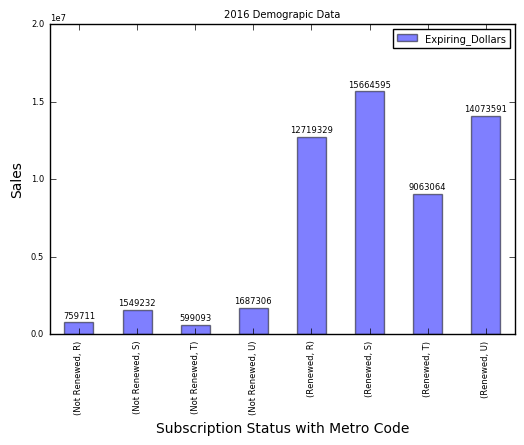

In [12]:
ax = sub_16_demo.groupby(['Subscription_Status' ,'Metro_Code'])['Expiring_Dollars'].sum().plot(kind="Bar", title="2016 Demograpic Data" , alpha=0.5 , ylim=(0,20000000) ,)
plt.xlabel('Subscription Status with Metro Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points' )
plt.legend()
plt.show()

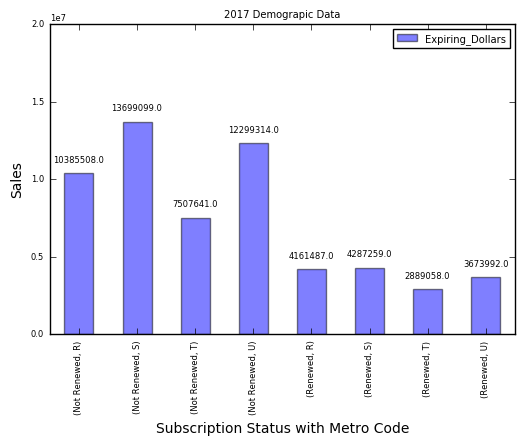

In [13]:
ax = sub_17_demo.groupby(['Subscription_Status' ,'Metro_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title="2017 Demograpic Data" , alpha=0.5 , ylim=(0,20000000) ,)
plt.xlabel('Subscription Status with Metro Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Cheking the Demographic Information Based on Avg Income 

In [14]:
demographic_op_1 = sub_16_demo.groupby(['Subscription_Status','Metro_Code' ,'Avg_Household_Income' ])['Expiring_Dollars'].sum()
demographic_op_1.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\Demographic_op1.csv", index=True , header=True)

demographic_op_2 = sub_17_demo.groupby(['Subscription_Status','Metro_Code' ,'Avg_Household_Income' ])['Expiring_Dollars'].sum()
demographic_op_2.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\Demographic_op2.csv", index=True , header=True)

In [15]:
demographic_op_3 = sub_16_demo.groupby(['Subscription_Status','Metro_Code' ,'Poverty_Level_Code' ])['Expiring_Dollars'].count()
demographic_op_3.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\Demographic_op3.csv", index=True , header=True)

demographic_op_4 = sub_17_demo.groupby(['Subscription_Status','Metro_Code' ,'Poverty_Level_Code' ])['Expiring_Dollars'].count()
demographic_op_4.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\Demographic_op4.csv", index=True , header=True)

#### Results are drived in Excel for Avg Income and Poverty Level

######     Finding the KPI (Key performance Indicators ) like Average Selling Price  = Sales / Number of Students 

In [16]:
sub_16_demo['Avg_Sell_price'] = sub_16_demo['Expiring_Dollars']/sub_16_demo['Expiring_Students']
sub_17_demo['Avg_Sell_price'] = sub_17_demo['Expiring_Dollars']/sub_17_demo['Expiring_Students']

C:\Users\dubey\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\dubey\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [17]:
# Checking the Impact of Average selling price on the Sales

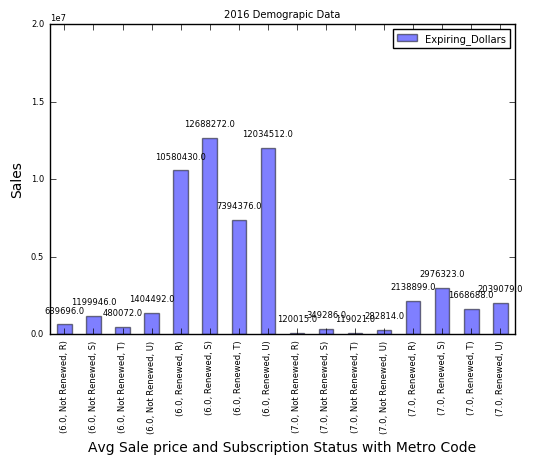

In [18]:
ax = sub_16_demo.groupby(['Avg_Sell_price' ,'Subscription_Status' ,'Metro_Code'])['Expiring_Dollars'].sum().plot(kind="Bar", title="2016 Demograpic Data", alpha=0.5 , ylim=(0,20000000) ,)
plt.xlabel('Avg Sale price and Subscription Status with Metro Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

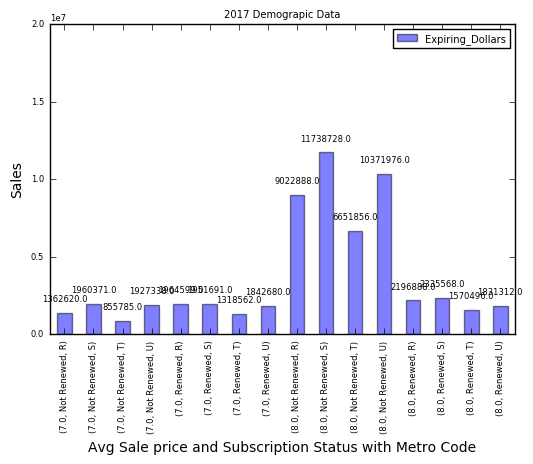

In [19]:
ax = sub_17_demo.groupby(['Avg_Sell_price' ,'Subscription_Status' ,'Metro_Code'])['Expiring_Dollars'].sum().plot(kind="Bar", title="2017 Demograpic Data", alpha=0.5 , ylim=(0,20000000) ,)
plt.xlabel('Avg Sale price and Subscription Status with Metro Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Are we Experiencing any time lag ??

In [20]:
sub_16_demo['Renewal_Date'] = sub_16_demo['Renewal_Date'].apply(pd.to_datetime)
sub_16_demo['Subscription_End_Date'] = sub_16_demo['Subscription_End_Date'].apply(pd.to_datetime)

sub_16_demo['Renew_delay'] = sub_16_demo['Renewal_Date'] - sub_16_demo['Subscription_End_Date']
sub_16_demo['Renew_delay'] = sub_16_demo['Renew_delay'] / np.timedelta64(1, 'D')

sub_17_demo['Renewal_Date'] = sub_17_demo['Renewal_Date'].apply(pd.to_datetime)
sub_17_demo['Subscription_End_Date'] = sub_17_demo['Subscription_End_Date'].apply(pd.to_datetime)

sub_17_demo['Renew_delay'] = sub_17_demo['Renewal_Date'] - sub_17_demo['Subscription_End_Date']
sub_17_demo['Renew_delay'] = sub_17_demo['Renew_delay'] / np.timedelta64(1, 'D')

C:\Users\dubey\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\dubey\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\dubey\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

###### Grouping the Time Lag 

In [21]:
def transform_diff_grp(dl):
    if dl > 180 : return 10
    elif 150 < dl <= 180 : return 9
    elif 120 < dl <= 150 : return 8
    elif 90 < dl <= 120 : return 7
    elif 30 < dl <= 90 : return 6
    elif 0 <= dl <= 30 : return 5
    elif -30 < dl <= -1 : return 4
    elif -90 < dl <= -30 : return 3
    elif -150 <= dl <= -90 : return 2
    elif -400 < dl <= -151 : return 1

In [22]:
sub_16_demo["Days_group"] = sub_16_demo['Renew_delay'].map(transform_diff_grp)
sub_17_demo["Days_group"] = sub_17_demo['Renew_delay'].map(transform_diff_grp)

C:\Users\dubey\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\dubey\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [23]:
sub_16_demo['Days_group'].fillna(11, inplace=True)
sub_17_demo['Days_group'].fillna(11, inplace=True)

C:\Users\dubey\Anaconda2\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


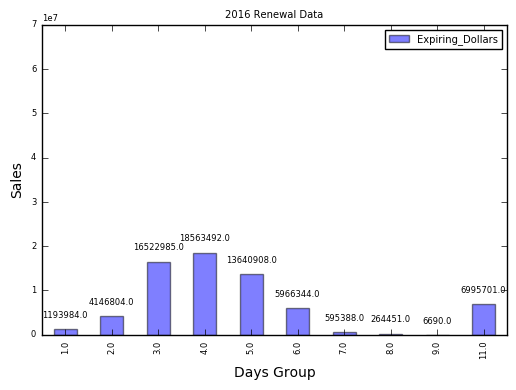

In [24]:
ax = sub_16_demo.groupby(['Days_group'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 Renewal Data", alpha=0.5 , ylim=(0,70000000))
plt.xlabel('Days Group', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

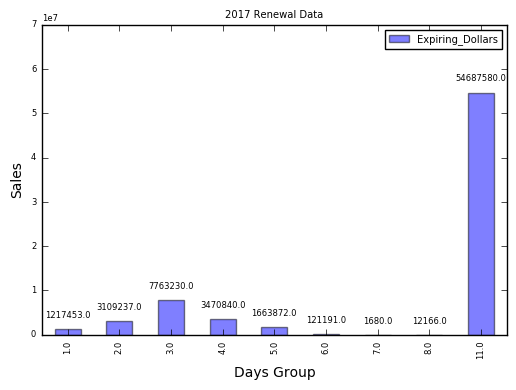

In [25]:
ax = sub_17_demo.groupby(['Days_group'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 Renewal Data", alpha=0.5 , ylim=(0,70000000))
plt.xlabel('Days Group', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Gropuing of Renewed and Not Renewed data 

In [26]:
sub_16_demo_ren = sub_16_demo[sub_16_demo['Subscription_Status']== "Renewed"]
sub_16_demo_nonren = sub_16_demo[sub_16_demo['Subscription_Status']== "Not Renewed"]

sub_17_demo_ren = sub_17_demo[sub_17_demo['Subscription_Status']== "Renewed"]
sub_17_demo_nonren = sub_17_demo[sub_17_demo['Subscription_Status']== "Not Renewed"]

###### Imputing Missing values "ZZ" in all the columns as the ZZ is not Present in Data as to get the missing value count 

In [27]:
sub_16_demo_ren.fillna('ZZ', inplace=True)
sub_17_demo_ren.fillna('ZZ', inplace=True)

sub_16_demo_nonren.fillna('ZZ', inplace=True)
sub_17_demo_nonren.fillna('ZZ', inplace=True)

C:\Users\dubey\Anaconda2\lib\site-packages\pandas\core\frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


##### Metro Space Analysis { R Rural/Non-Metro , S Suburban, U Urban , T Town }

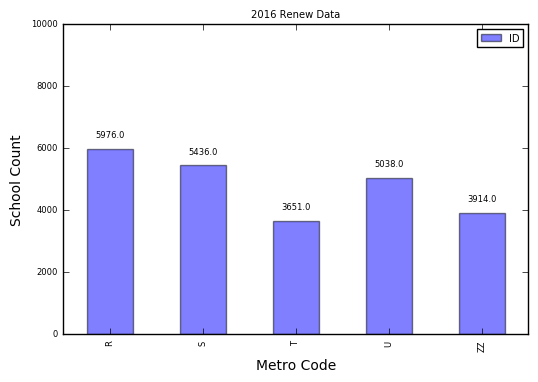

In [28]:
 ax = sub_16_demo_ren.groupby(['Metro_Code'])['ID'].count().plot(kind="Bar" , title= "2016 Renew Data", alpha=0.5 , ylim=(0,10000))
plt.xlabel('Metro Code', fontsize=10)
plt.ylabel('School Count', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

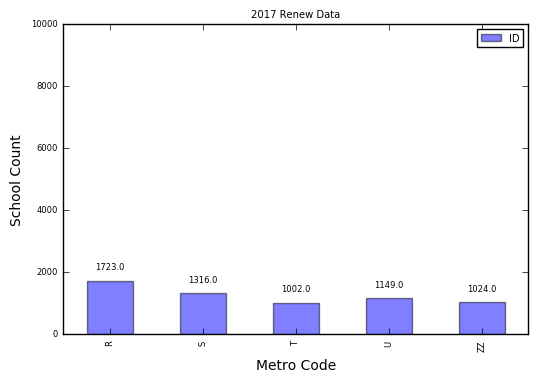

In [29]:
 ax = sub_17_demo_ren.groupby(['Metro_Code'])['ID'].count().plot(kind="Bar" , title= "2017 Renew Data", alpha=0.5 , ylim=(0,10000))
plt.xlabel('Metro Code', fontsize=10)
plt.ylabel('School Count', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

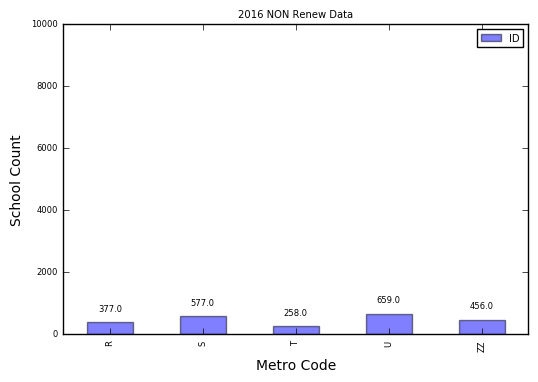

In [30]:
 ax = sub_16_demo_nonren.groupby(['Metro_Code'])['ID'].count().plot(kind="Bar" , title= "2016 NON Renew Data", alpha=0.5 , ylim=(0,10000))
plt.xlabel('Metro Code', fontsize=10)
plt.ylabel('School Count', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

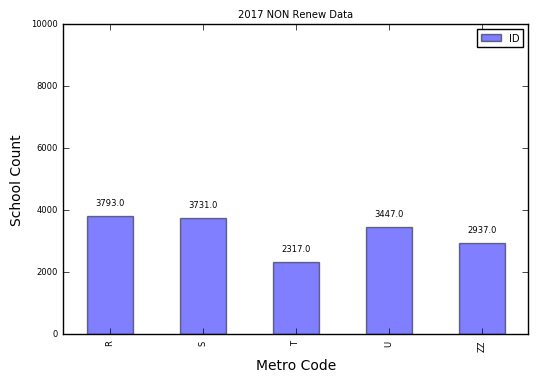

In [31]:
 ax = sub_17_demo_nonren.groupby(['Metro_Code'])['ID'].count().plot(kind="Bar" , title= "2017 NON Renew Data", alpha=0.5 , ylim=(0,10000))
plt.xlabel('Metro Code', fontsize=10)
plt.ylabel('School Count', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Apple Mac Code {A 1-9  B 10-24  C 25-49 D 50-99 E 100-249 F 250-499 G 500-999 H 1,000-4,999 I 5,000-9,999 J 10,000 Or More K Unknown Quantity}


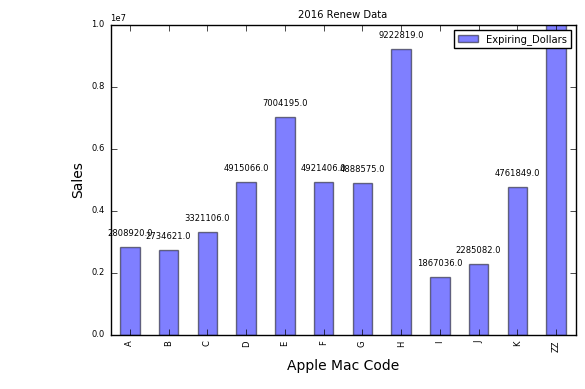

In [32]:
 ax = sub_16_demo_ren.groupby(['Apple_Mac_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 Renew Data", alpha=0.5 , ylim=(0,10000000))
plt.xlabel('Apple Mac Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

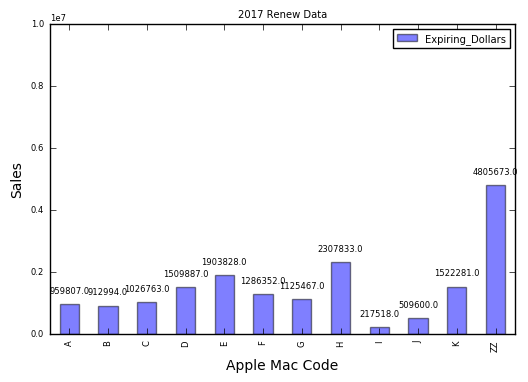

In [33]:
 ax = sub_17_demo_ren.groupby(['Apple_Mac_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 Renew Data", alpha=0.5 , ylim=(0,10000000))
plt.xlabel('Apple Mac Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

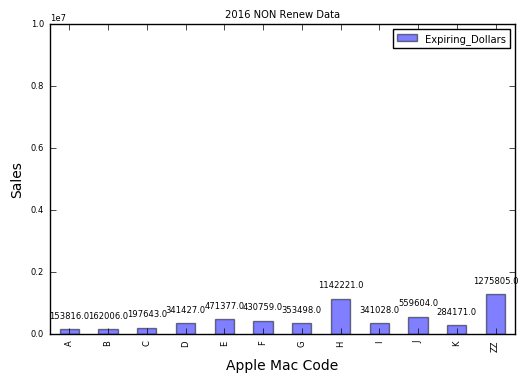

In [34]:
 ax = sub_16_demo_nonren.groupby(['Apple_Mac_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 NON Renew Data", alpha=0.5 , ylim=(0,10000000))
plt.xlabel('Apple Mac Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

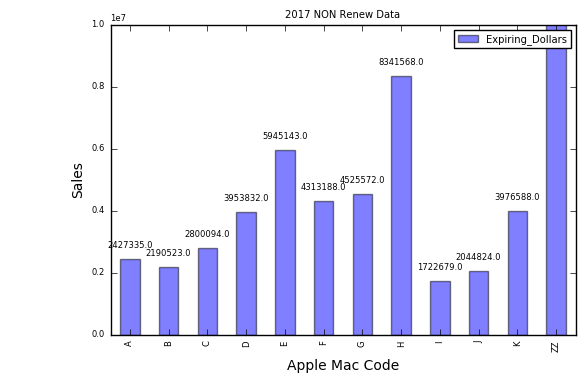

In [35]:
 ax = sub_17_demo_nonren.groupby(['Apple_Mac_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 NON Renew Data", alpha=0.5 , ylim=(0,10000000))
plt.xlabel('Apple Mac Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### PC Code A 1-9 B 10-24 C 25-49 D 50-99  E 100-249 F 250-499  G 500-999 H 1,000-4,999 I 5,000-9,999 J 10,000 Or More K Unknown Quantity  )

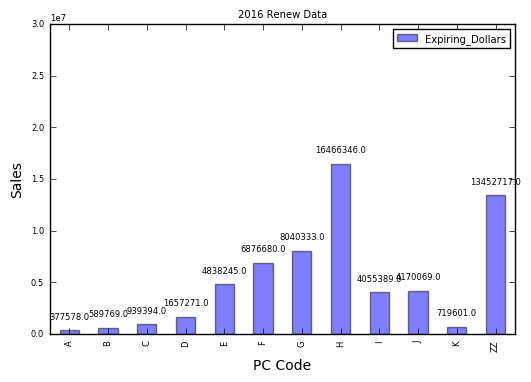

In [36]:
 ax = sub_16_demo_ren.groupby(['PC_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 Renew Data", alpha=0.5 , ylim=(0,30000000))
plt.xlabel('PC Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

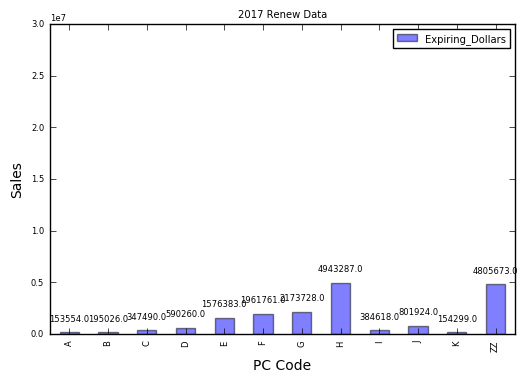

In [37]:
 ax = sub_17_demo_ren.groupby(['PC_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 Renew Data", alpha=0.5 , ylim=(0,30000000))
plt.xlabel('PC Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

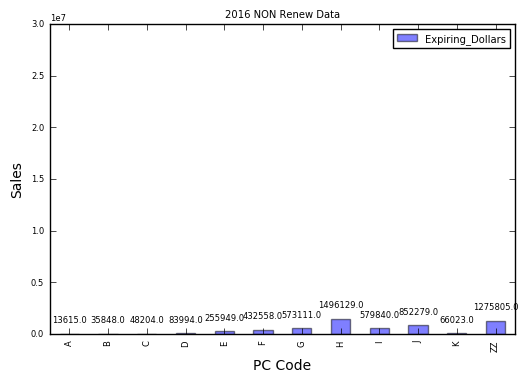

In [38]:
 ax = sub_16_demo_nonren.groupby(['PC_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 NON Renew Data", alpha=0.5 , ylim=(0,30000000))
plt.xlabel('PC Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

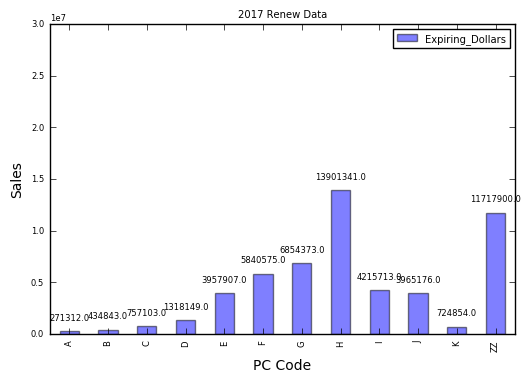

In [39]:
 ax = sub_17_demo_nonren.groupby(['PC_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 Renew Data", alpha=0.5 , ylim=(0,30000000))
plt.xlabel('PC Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Poverty Level ( A 0 - 5.9 Percent B 6 - 15.9 Percent C 16 - 30.9 Percent D 31 Percent Or More  E Unclassified)


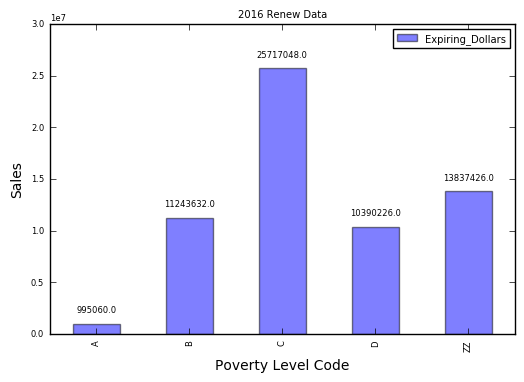

In [40]:
 ax = sub_16_demo_ren.groupby(['Poverty_Level_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 Renew Data", alpha=0.5 , ylim=(0,30000000))
plt.xlabel('Poverty Level Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

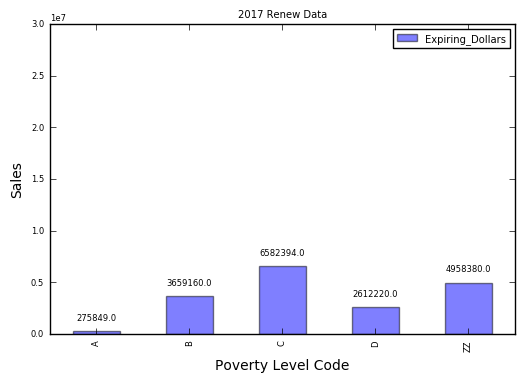

In [41]:
 ax = sub_17_demo_ren.groupby(['Poverty_Level_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 Renew Data", alpha=0.5 , ylim=(0,30000000))
plt.xlabel('Poverty Level Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

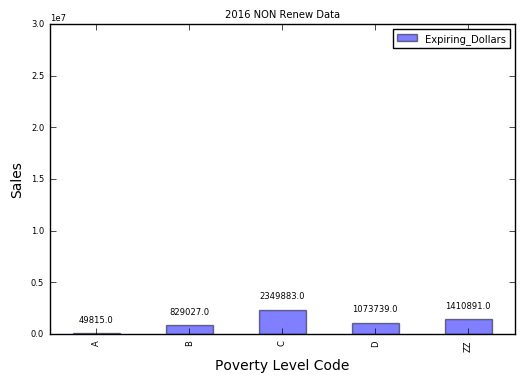

In [42]:
 ax = sub_16_demo_nonren.groupby(['Poverty_Level_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 NON Renew Data", alpha=0.5 , ylim=(0,30000000))
plt.xlabel('Poverty Level Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

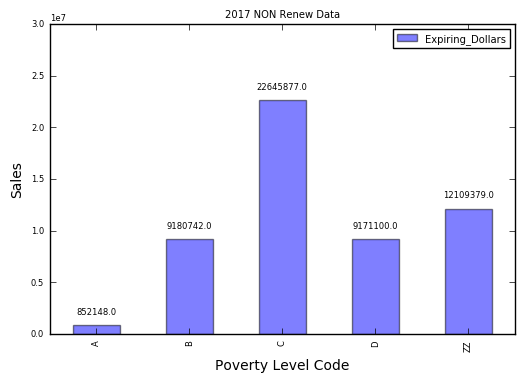

In [43]:
 ax = sub_17_demo_nonren.groupby(['Poverty_Level_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 NON Renew Data", alpha=0.5 , ylim=(0,30000000))
plt.xlabel('Poverty Level Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

##### Average House hold Income { A 1-27,999  B 28,000-31,999 C 32,000-34,999 D 35,000-36,999 E 37,000-38,999 F 39,000-40,999 G 41,000-42,999 H 43,000-44,999 I 45,000-47,999 J 48,000-51,999 K 52,000-54,999 L 55,000-59,999 M 60,000-64,999 N 65,000-69,999 O 70,000-80,999 P 81,000-93,999  Q 94,000 Plus Z unclassified }  

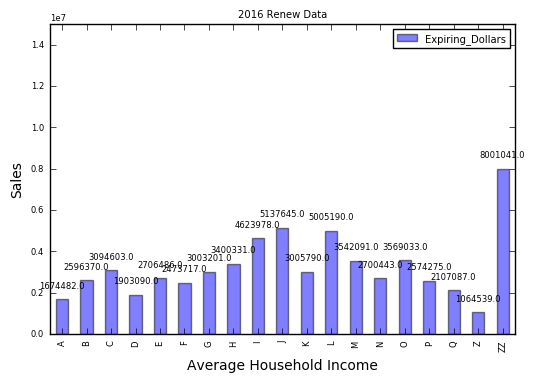

In [44]:
 ax = sub_16_demo_ren.groupby(['Avg_Household_Income'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 Renew Data", alpha=0.5 , ylim=(0,15000000))
plt.xlabel('Average Household Income', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

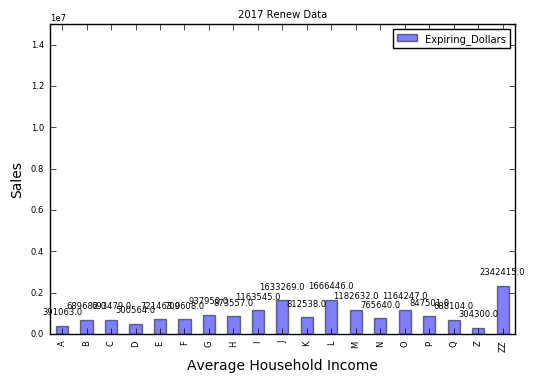

In [45]:
 ax = sub_17_demo_ren.groupby(['Avg_Household_Income'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 Renew Data", alpha=0.5 , ylim=(0,15000000))
plt.xlabel('Average Household Income', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

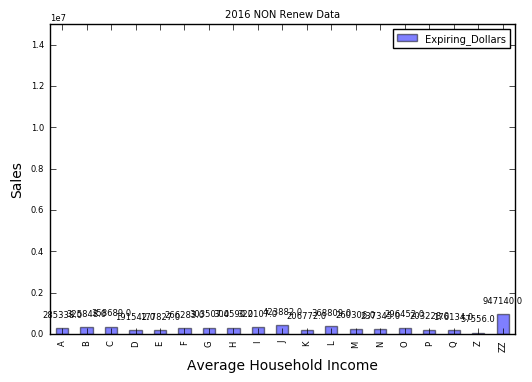

In [46]:
 ax = sub_16_demo_nonren.groupby(['Avg_Household_Income'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 NON Renew Data", alpha=0.5 , ylim=(0,15000000))
plt.xlabel('Average Household Income', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

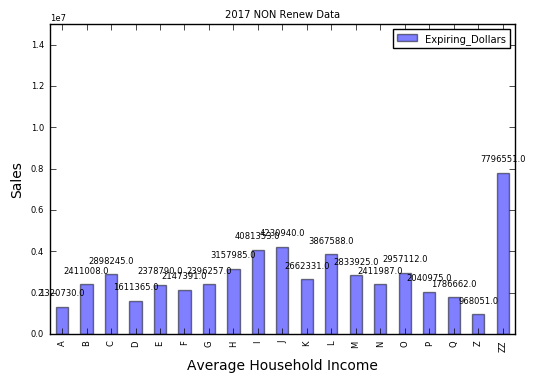

In [47]:
 ax = sub_17_demo_nonren.groupby(['Avg_Household_Income'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 NON Renew Data", alpha=0.5 , ylim=(0,15000000))
plt.xlabel('Average Household Income', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

##### Title_1_Code A $ .00 - $149.99  B $150.00 - $299.99  C $300.00 - $499.99  D $500.00 Plus  Space Unclassified 


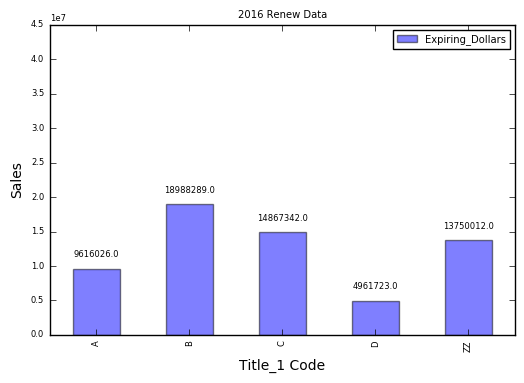

In [48]:
 ax = sub_16_demo_ren.groupby(['Title_1_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 Renew Data", alpha=0.5 , ylim=(0,45000000))
plt.xlabel('Title_1 Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

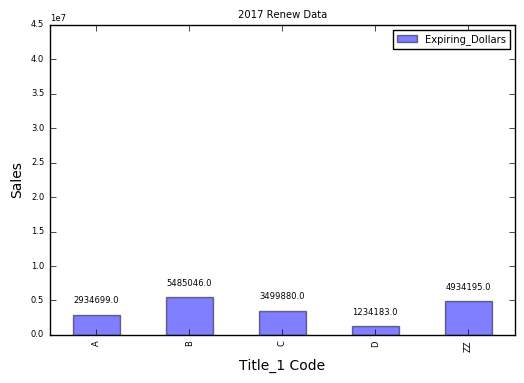

In [49]:
 ax = sub_17_demo_ren.groupby(['Title_1_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 Renew Data", alpha=0.5 , ylim=(0,45000000))
plt.xlabel('Title_1 Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

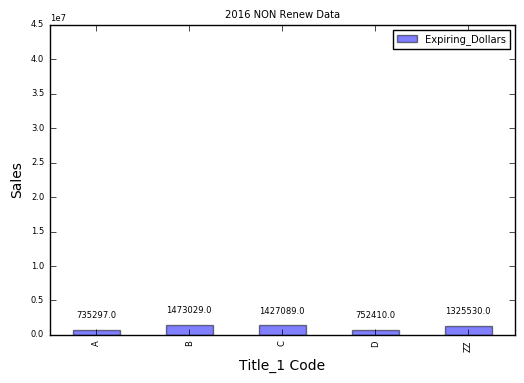

In [50]:
 ax = sub_16_demo_nonren.groupby(['Title_1_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 NON Renew Data", alpha=0.5 , ylim=(0,45000000))
plt.xlabel('Title_1 Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

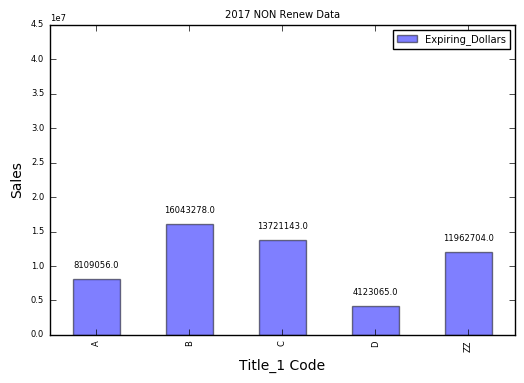

In [51]:
 ax = sub_17_demo_nonren.groupby(['Title_1_Code'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 NON Renew Data", alpha=0.5 , ylim=(0,45000000))
plt.xlabel('Title_1 Code', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Training_Budget_Per_head "A $1 - $4  B $5 - $6  C $7 - $8  D $9 - $10 E $11 - $13  F $14 - $16 G $17 - $24 H $25 + Z Unclassified

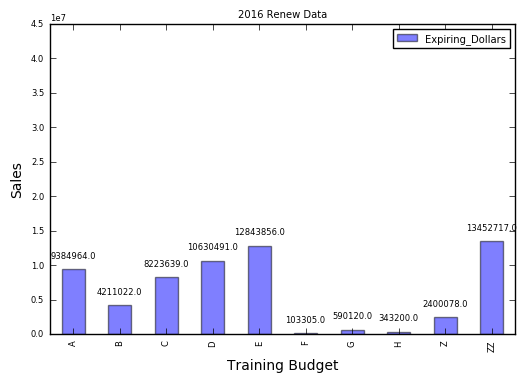

In [52]:
 ax = sub_16_demo_ren.groupby(['Training_Budget_Per_head'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 Renew Data", alpha=0.5 , ylim=(0,45000000))
plt.xlabel('Training Budget', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

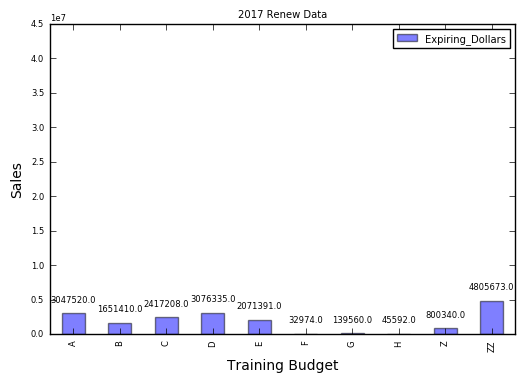

In [53]:
 ax = sub_17_demo_ren.groupby(['Training_Budget_Per_head'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 Renew Data", alpha=0.5 , ylim=(0,45000000))
plt.xlabel('Training Budget', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

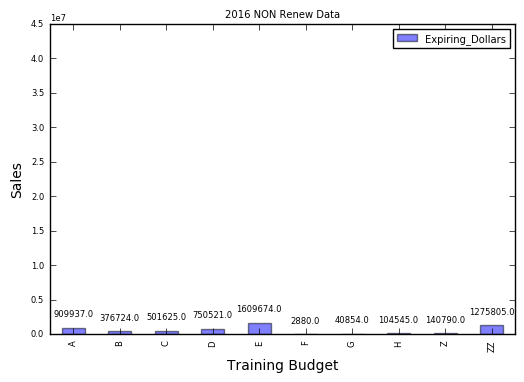

In [54]:
 ax = sub_16_demo_nonren.groupby(['Training_Budget_Per_head'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2016 NON Renew Data", alpha=0.5 , ylim=(0,45000000))
plt.xlabel('Training Budget', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

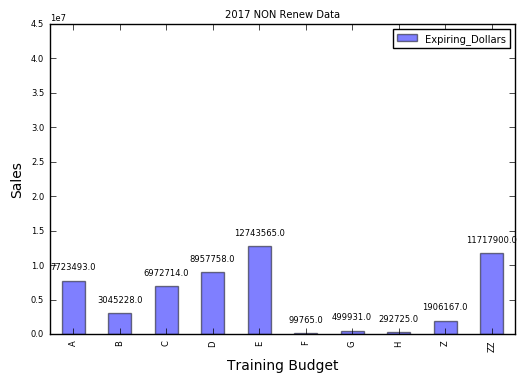

In [55]:
 ax = sub_17_demo_nonren.groupby(['Training_Budget_Per_head'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 NON Renew Data", alpha=0.5 , ylim=(0,45000000))
plt.xlabel('Training Budget', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Lunch_Program_Eligible_Students 

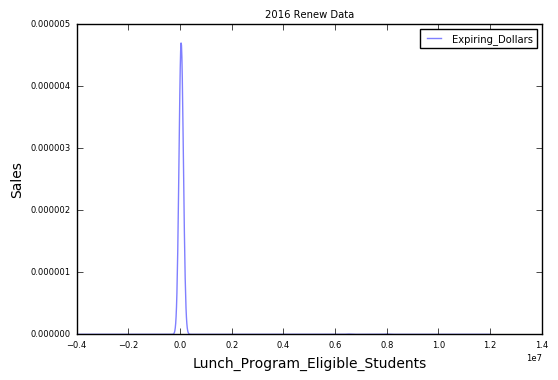

In [56]:
 ax = sub_16_demo_ren.groupby(['Lunch_Program_Eligible_Students'])['Expiring_Dollars'].sum().plot(kind="density" , title= "2016 Renew Data", alpha=0.5 )
plt.xlabel('Lunch_Program_Eligible_Students', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

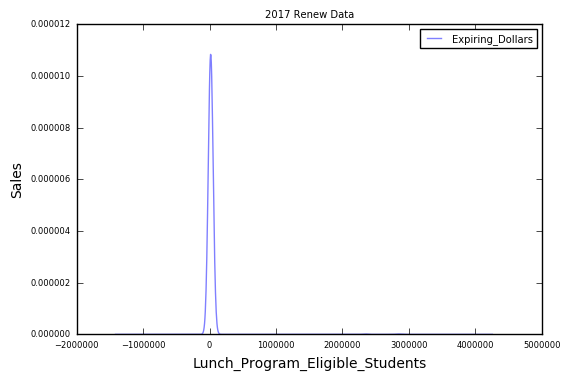

In [57]:
 ax = sub_17_demo_ren.groupby(['Lunch_Program_Eligible_Students'])['Expiring_Dollars'].sum().plot(kind="density" , title= "2017 Renew Data", alpha=0.5 )
plt.xlabel('Lunch_Program_Eligible_Students', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

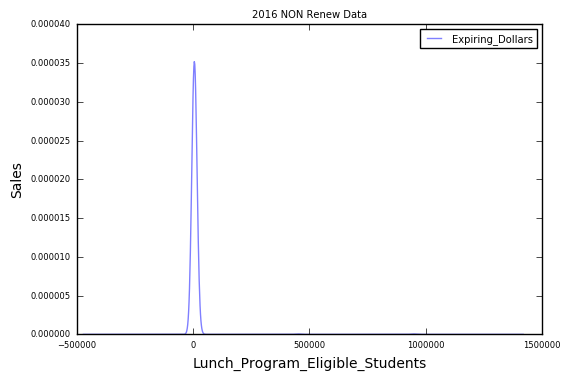

In [58]:
 ax = sub_16_demo_nonren.groupby(['Lunch_Program_Eligible_Students'])['Expiring_Dollars'].sum().plot(kind="density" , title= "2016 NON Renew Data", alpha=0.5 )
plt.xlabel('Lunch_Program_Eligible_Students', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

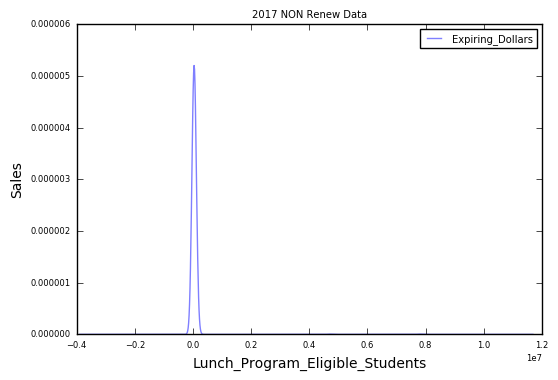

In [59]:
 ax = sub_17_demo_nonren.groupby(['Lunch_Program_Eligible_Students'])['Expiring_Dollars'].sum().plot(kind="density" , title= "2017 NON Renew Data", alpha=0.5 )
plt.xlabel('Lunch_Program_Eligible_Students', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Affluence_Indicator 1 Low 2 Below Average  3 Average  4 Above Average  5 High  Space Unknown    

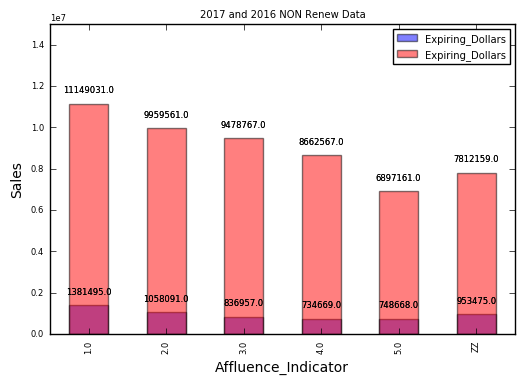

In [60]:
ax1 = sub_16_demo_nonren.groupby(['Affluence_Indicator'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 and 2016 NON Renew Data", alpha=0.5,color="Blue" ,ylim=(0,15000000))
ax = sub_17_demo_nonren.groupby(['Affluence_Indicator'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 and 2016 NON Renew Data", alpha=0.5,color="Red" ,ylim=(0,15000000))
plt.xlabel('Affluence_Indicator', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax1.patches:
    ax1.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

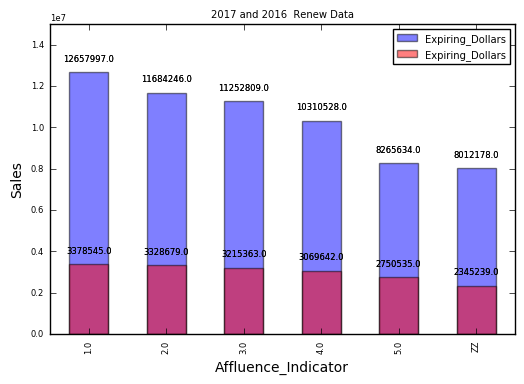

In [61]:
ax1 = sub_16_demo_ren.groupby(['Affluence_Indicator'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 and 2016  Renew Data", alpha=0.5,color="Blue" ,ylim=(0,15000000))
ax = sub_17_demo_ren.groupby(['Affluence_Indicator'])['Expiring_Dollars'].sum().plot(kind="Bar" , title= "2017 and 2016  Renew Data", alpha=0.5,color="Red" ,ylim=(0,15000000))
plt.xlabel('Affluence_Indicator', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax1.patches:
    ax1.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

###### Average Selling Price = Sales / Number of Students 

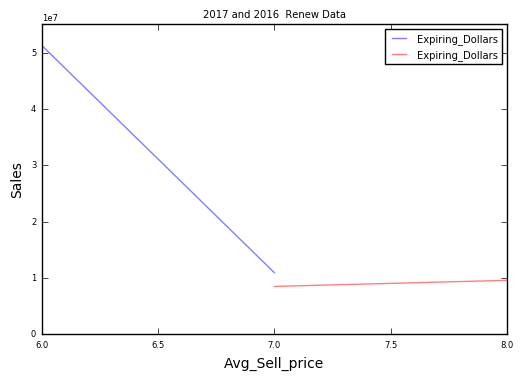

In [62]:
ax1 = sub_16_demo_ren.groupby(['Avg_Sell_price'])['Expiring_Dollars'].sum().plot(kind="line" , title= "2017 and 2016  Renew Data", alpha=0.5,color="Blue" ,ylim=(0,55000000))
ax = sub_17_demo_ren.groupby(['Avg_Sell_price'])['Expiring_Dollars'].sum().plot(kind="line" , title= "2017 and 2016  Renew Data", alpha=0.5,color="Red" ,ylim=(0,55000000))
plt.xlabel('Avg_Sell_price', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax1.patches:
    ax1.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

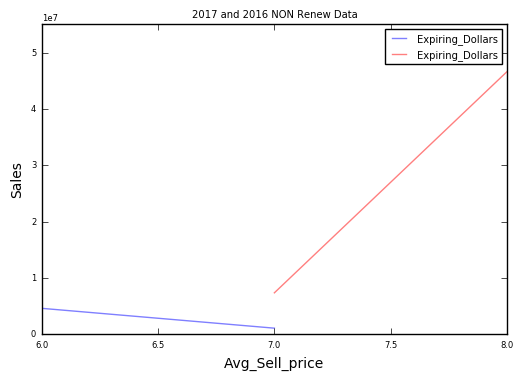

In [63]:
ax1 = sub_16_demo_nonren.groupby(['Avg_Sell_price'])['Expiring_Dollars'].sum().plot(kind="line" , title= "2017 and 2016 NON  Renew Data", alpha=0.5,color="Blue" ,ylim=(0,55000000))
ax = sub_17_demo_nonren.groupby(['Avg_Sell_price'])['Expiring_Dollars'].sum().plot(kind="line" , title= "2017 and 2016 NON Renew Data", alpha=0.5,color="Red" ,ylim=(0,55000000))
plt.xlabel('Avg_Sell_price', fontsize=10)
plt.ylabel('Sales', fontsize=10)
for p in ax1.patches:
    ax1.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

In [64]:
sub_17_demo_nonren.count()

ID                                 16225
State                              16225
Subscription_End_Date              16225
Expiring_Dollars                   16225
Expiring_Students                  16225
Subscription_Status                16225
Renewal_Date                       16225
Metro_Code                         16225
Apple_Mac_Code                     16225
PC_Code                            16225
Poverty_Level_Code                 16225
Avg_Household_Income               16225
Title_1_Code                       16225
Software_budget_per_head           16225
Training_Budget_Per_head           16225
Lunch_Program_Eligible_Students    16225
Affluence_Indicator                16225
Avg_Sell_price                     16225
Renew_delay                        16225
Days_group                         16225
dtype: int64

In [65]:
sub_17_demo_nonren['Expiring_Students'].sum()

6876505L

## Data Modelling 

###### Label Encoding on Data For Modelling 

In [66]:
# Creating the Training Data 
frames = [sub_16_demo_ren, sub_16_demo_nonren, sub_17_demo_ren]
Final_train = pd.concat(frames)

In [67]:
# Manupulating the Data , For Missing Data iMputing Random value 
# IN Subscription End Date and Renewal Date 

Final_train.loc[(Final_train.Subscription_End_Date== 'ZZ') ,'Subscription_End_Date' ] = 0
Final_train.loc[(Final_train.Renewal_Date== 'ZZ') ,'Renewal_Date' ] = 0
                
test = pd.DataFrame(sub_17_demo_nonren)
test['Subscription_End_Date'] = test['Subscription_End_Date'].apply(pd.to_datetime)

Final_train['Subscription_End_Date'] = Final_train['Subscription_End_Date'].apply(pd.to_datetime)
Final_train['Renewal_Date'] = Final_train['Renewal_Date'].apply(pd.to_datetime)

Final_train.loc[(Final_train.Renew_delay== 'ZZ') ,'Renew_delay' ] = 999
test.loc[(test.Renew_delay== 'ZZ') ,'Renew_delay' ] = 999

In [68]:
# Saving the Files  Training and Test        
         
Final_train.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\Train.csv", index=True , header=True)     
test.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\test.csv", index=True , header=True) 

In [69]:
# Manually Labelling the Subscription_Status for further analysis 
y = pd.DataFrame(Final_train['Subscription_Status'])
Final_train = Final_train.drop('Subscription_Status', 1)
test = test.drop('Subscription_Status', 1)

y.loc[(y.Subscription_Status== 'Renewed') ,'Subscription_Status' ] = 0
y.loc[(y.Subscription_Status== 'Not Renewed') ,'Subscription_Status' ] = 1

Y_train = list(y.Subscription_Status.values)

In [70]:
# Encoding the variable
Final_train_Data = Final_train.apply(lambda x: d[x.name].fit_transform(x))
test_Data = test.apply(lambda x: d1[x.name].fit_transform(x))


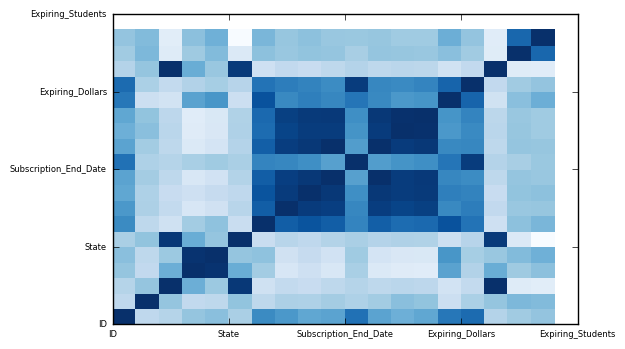

In [71]:
# Checking the Corrrelation Matrix 
Corr_Analysis_Train = Final_train_Data.corr()
Corr_Analysis_Train.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\Corr_Analysis_Train.csv", index=True , header=True)
#plt.imshow(Corr_Analysis_Train, cmap='Purples', interpolation='nearest')
fig, ax = plt.subplots()
ax.pcolor(Corr_Analysis_Train.corr(), cmap=plt.cm.Blues)
ax.set_xticklabels(Corr_Analysis_Train.columns)
ax.set_yticklabels(Corr_Analysis_Train.columns)
plt.show()

In [72]:
#Removing the High Corelated Values 

In [73]:
Final_train_Data_new =  Final_train_Data.drop('Title_1_Code', 1)
Final_train_Data_new =  Final_train_Data_new.drop('PC_Code', 1)
Final_train_Data_new =  Final_train_Data_new.drop('Software_budget_per_head', 1)
#Final_train_Data_new =  Final_train_Data_new.drop('Training_Budget_Per_head', 1)

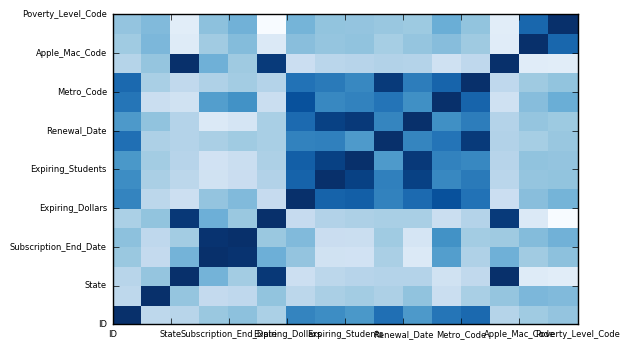

In [74]:
# Checking the Corrrelation Matrix 
Corr_Analysis_Train = Final_train_Data_new.corr()
#Corr_Analysis_Train.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\Corr_Analysis_Train.csv", index=True , header=True)
#plt.imshow(Corr_Analysis_Train, cmap='Purples', interpolation='nearest')
fig, ax = plt.subplots()
ax.pcolor(Corr_Analysis_Train.corr(), cmap=plt.cm.Blues)
ax.set_xticklabels(Corr_Analysis_Train.columns)
ax.set_yticklabels(Corr_Analysis_Train.columns)
plt.show()

In [75]:
# Predicting the Renewed and Non Renewed Data for 2017 Defining X and Y 
X = Final_train_Data_new

In [76]:
log_reg = LogisticRegression(solver='liblinear', C=100, tol=0.08)
log_reg.fit(X,Y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.08,
          verbose=0, warm_start=False)

In [77]:
print(log_reg.score(X, Y_train))

0.946031453496


In [78]:
test1 =  test_Data.drop('Title_1_Code', 1)
test1 =  test1.drop('PC_Code', 1)
test1 =  test1.drop('Software_budget_per_head', 1)

In [79]:
y_test = log_reg.predict(test1)

In [80]:
# Inverse the encoded
test = test_Data.apply(lambda x: d1[x.name].inverse_transform(x))
test['Subscription_Status'] = y_test

In [81]:
# Manually Un-Labelling the Subscription_Status 
test.loc[(test.Subscription_Status== 0) ,'Subscription_Status' ] = 'Renewed'
test.loc[(test.Subscription_Status== 1) ,'Subscription_Status' ] = 'Not Renewed'

In [82]:
test.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\Final_Results.csv", index=True , header=True)  

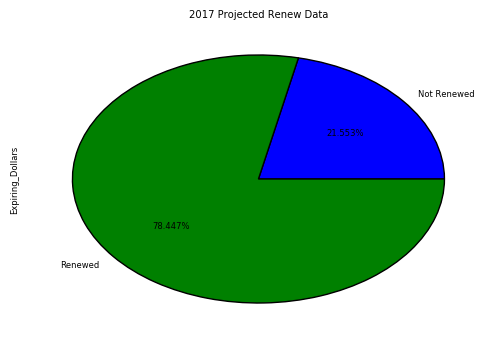

In [83]:
test_results = test 
# CHecking and Analysing the Results
test_results.groupby(['Subscription_Status'])['Expiring_Dollars'].count().plot(kind="pie" , autopct='%3.3f%%',title= "2017 Projected Renew Data")
plt.show()

###### Months in which Chances of Getting Renewed 

In [84]:
frames = [sub_16_demo_ren, sub_16_demo_nonren]
Data_2016 = pd.concat(frames)
Data_final_2016 = Data_2016.drop(Data_2016[Data_2016['Subscription_Status'] == "Not Renewed"].index)


frames1 = [sub_17_demo_ren, test_results]
Data_2017 = pd.concat(frames1)
Data_final_2017 = Data_2017.drop(Data_2017[Data_2017['Subscription_Status'] == "Not Renewed"].index)


Data_final_2016['Subscription_End_Date'] = Data_final_2016['Subscription_End_Date'].apply(pd.to_datetime)
Data_final_2017['Subscription_End_Date'] = Data_final_2017['Subscription_End_Date'].apply(pd.to_datetime)

Data_final_2016['month'] = pd.DatetimeIndex(Data_final_2016['Subscription_End_Date']).month
Data_final_2017['month'] = pd.DatetimeIndex(Data_final_2017['Subscription_End_Date']).month

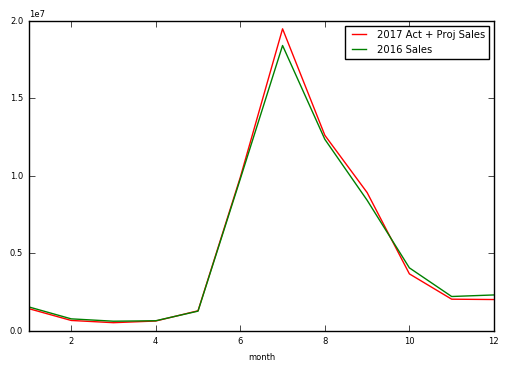

In [85]:
Data_final_2017.groupby(['month'])['Expiring_Dollars'].sum().plot(kind="line", color="Red" , label="2017 Act + Proj Sales")
Data_final_2016.groupby(['month'])['Expiring_Dollars'].sum().plot(kind="line", color="Green" , label="2016 Sales")
plt.legend()
plt.show()

###### Getting Non Subscribed School are in which Cities more 

In [86]:
non_subs_school= pd.DataFrame(test_results[test_results['Subscription_Status']=="Not Renewed"])

In [87]:
non_subs_school.columns

Index([u'ID', u'State', u'Subscription_End_Date', u'Expiring_Dollars',
       u'Expiring_Students', u'Renewal_Date', u'Metro_Code', u'Apple_Mac_Code',
       u'PC_Code', u'Poverty_Level_Code', u'Avg_Household_Income',
       u'Title_1_Code', u'Software_budget_per_head',
       u'Training_Budget_Per_head', u'Lunch_Program_Eligible_Students',
       u'Affluence_Indicator', u'Avg_Sell_price', u'Renew_delay',
       u'Days_group', u'Subscription_Status'],
      dtype='object')

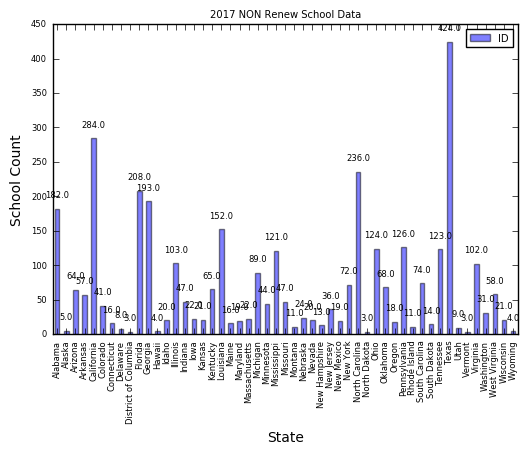

In [88]:
 ax = non_subs_school.groupby(['State'])['ID'].count().plot(kind="Bar" , title= "2017 NON Renew School Data", alpha=0.5 )
plt.xlabel('State', fontsize=10)
plt.ylabel('School Count', fontsize=10)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend()
plt.show()

In [89]:
non_subs_school['ID'].count()

3497

In [90]:
Data_2017.to_csv("D:\\Analytics Excercise\\AnalyticsExercise\\Data\\Findings\\2017.csv", index=True , header=True) 